<a href="https://colab.research.google.com/github/victorncg/financas_quantitativas/blob/main/Simula%C3%A7%C3%A3o_de_Monte_Carlo_v_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "250">

---

# **Simulação de Portfólios com o Método de Monte Carlo**

<img src = "https://github.com/victorncg/auxiliary/blob/931dd28e096d1f7f9bf11af5e99eb91c614e9bf2/20240401%20-%20BANNER%20-%20CASE%20-%20SIMULA%C3%87%C3%83O%20DE%20MONTE%20CARLO.png?raw=true" width = "300" >

O método de Monte Carlo é uma técnica estatística e computacional que usa números aleatórios para resolver problemas matemáticos complexos através da simulação de múltiplas amostras.

A ideia básica é usar a aleatoriedade para aproximar soluções para problemas que são difíceis ou impossíveis de resolver de forma analítica.

Na prática, o método de Monte Carlo funciona gerando uma grande quantidade de números aleatórios que seguem uma distribuição específica e, em seguida, usando esses números para estimar valores de interesse. Isso pode incluir estimar integrais, resolver equações diferenciais, simular sistemas físicos complexos, calcular probabilidades, entre outros.

### **Racional do método de Monte Carlo**

* Gerar variáveis aleatórias de acordo com alguma distribuição
* Usar estas variáveis aleatóras na condução de algum experimento

Nesta aula, vamos utilizar o método de Monte Carlo para simular portfólios de investimento.

A ideia aqui é simples: vamos simular os retornos diários dos ativos deste portfólio, e com base nestes retornos diários vamos calcular o retorno acumulado destes vários portfólios ao longo do tempo.

Precisamos lembrar aqui de alguns conceitos que já aprendemos antes:

* A matriz de covariância mede como diferentes ativos se movem juntos. Ela descreve como os retornos de diferentes ativos se relacionam entre si;
* Desta forma, usar a matriz de covariância é um recurso que nós temos para simular retornos diários que façam sentido de acordo com o comportamento atual destes ativos;

Referência para entender o método de Monte Carlo:

https://www.youtube.com/watch?v=OFr4JPK12DE&list=PLPe-_ytPHqyh3E5EdDAxOwHQkB0eDOpZb&index=11

https://pt.wikipedia.org/wiki/Fatora%C3%A7%C3%A3o_de_Cholesky#:~:text=Em%20%C3%A1lgebra%20linear%2C%20a%20decomposi%C3%A7%C3%A3o,e%20simula%C3%A7%C3%B5es%20de%20Monte%20Carlo.

## Importação das bibliotecas e captura dos dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import numpy as np

In [ ]:
fim = '2024-03-15'
inicio = '2021-01-15'

In [ ]:
acoes = ['AAPL', 'VALE3.SA', 'PETR4.SA', 'WEGE3.SA', 'MGLU3.SA', 'BBDC4.SA', 'PRIO3.SA', 'LREN3.SA']

In [ ]:
dados = yf.download(acoes, inicio, fim)['Close']

[*********************100%%**********************]  8 of 8 completed


## Cálculo das métricas quantitativas

In [ ]:
returns = dados.pct_change()

In [ ]:
meanReturns = returns.mean()

In [ ]:
covMatrix = returns.cov()

In [ ]:
meanReturns

Ticker
AAPL        0.000521
BBDC4.SA   -0.000328
LREN3.SA   -0.000690
MGLU3.SA   -0.001958
PETR4.SA    0.000647
PRIO3.SA    0.001854
VALE3.SA   -0.000318
WEGE3.SA    0.000031
dtype: float64

In [ ]:
covMatrix

Ticker,AAPL,BBDC4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,PRIO3.SA,VALE3.SA,WEGE3.SA
Ticker,,,,,,,,
AAPL,0.000288,0.000052,0.000056,0.000144,0.000037,0.000063,0.000034,0.000063
BBDC4.SA,0.000052,0.000398,0.000218,0.000230,0.000148,0.000106,0.000067,0.000070
LREN3.SA,0.000056,0.000218,0.000719,0.000599,0.000137,0.000140,0.000040,0.000148
MGLU3.SA,0.000144,0.000230,0.000599,0.001999,0.000123,0.000239,0.000072,0.000218
PETR4.SA,0.000037,0.000148,0.000137,0.000123,0.000657,0.000197,0.000110,0.000061
PRIO3.SA,0.000063,0.000106,0.000140,0.000239,0.000197,0.000808,0.000170,0.000100
VALE3.SA,0.000034,0.000067,0.000040,0.000072,0.000110,0.000170,0.000436,0.000057
WEGE3.SA,0.000063,0.000070,0.000148,0.000218,0.000061,0.000100,0.000057,0.000386


In [ ]:
meanReturns.sort_values()*100

Ticker
MGLU3.SA   -0.195821
LREN3.SA   -0.069043
BBDC4.SA   -0.032762
VALE3.SA   -0.031761
WEGE3.SA    0.003141
AAPL        0.052105
PETR4.SA    0.064679
PRIO3.SA    0.185437
dtype: float64

In [ ]:
covMatrix

Ticker,AAPL,BBDC4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,PRIO3.SA,VALE3.SA,WEGE3.SA
Ticker,,,,,,,,
AAPL,0.000288,0.000052,0.000056,0.000144,0.000037,0.000063,0.000034,0.000063
BBDC4.SA,0.000052,0.000398,0.000218,0.000230,0.000148,0.000106,0.000067,0.000070
LREN3.SA,0.000056,0.000218,0.000719,0.000599,0.000137,0.000140,0.000040,0.000148
MGLU3.SA,0.000144,0.000230,0.000599,0.001999,0.000123,0.000239,0.000072,0.000218
PETR4.SA,0.000037,0.000148,0.000137,0.000123,0.000657,0.000197,0.000110,0.000061
PRIO3.SA,0.000063,0.000106,0.000140,0.000239,0.000197,0.000808,0.000170,0.000100
VALE3.SA,0.000034,0.000067,0.000040,0.000072,0.000110,0.000170,0.000436,0.000057
WEGE3.SA,0.000063,0.000070,0.000148,0.000218,0.000061,0.000100,0.000057,0.000386


In [ ]:
weights = np.random.random(len(meanReturns))

In [ ]:
weights /= np.sum(weights)

In [ ]:
weights

array([0.07768136, 0.1380279 , 0.09830851, 0.03032106, 0.11949227,
       0.17751089, 0.18382687, 0.17483112])

In [ ]:
sum(weights)

1.0000000000000002

## Configuração dos parâmetros de entrada

In [ ]:
# number of simulations
mc_sims = 10000

# timeframe in days
T = 300

meanM: Uma matriz de tamanho (T, número de ativos), preenchida com os retornos médios esperados de cada ativo para cada dia.

In [ ]:
meanM = np.full(shape=(T, len(weights)), fill_value = meanReturns)

In [ ]:
pd.DataFrame(meanM)

,0,1,2,3,4,5,6,7
0,0.000521,-0.000328,-0.00069,-0.001958,0.000647,0.001854,-0.000318,0.000031
1,0.000521,-0.000328,-0.00069,-0.001958,0.000647,0.001854,-0.000318,0.000031
2,0.000521,-0.000328,-0.00069,-0.001958,0.000647,0.001854,-0.000318,0.000031
3,0.000521,-0.000328,-0.00069,-0.001958,0.000647,0.001854,-0.000318,0.000031
4,0.000521,-0.000328,-0.00069,-0.001958,0.000647,0.001854,-0.000318,0.000031
...,...,...,...,...,...,...,...,...
295,0.000521,-0.000328,-0.00069,-0.001958,0.000647,0.001854,-0.000318,0.000031
296,0.000521,-0.000328,-0.00069,-0.001958,0.000647,0.001854,-0.000318,0.000031
297,0.000521,-0.000328,-0.00069,-0.001958,0.000647,0.001854,-0.000318,0.000031
298,0.000521,-0.000328,-0.00069,-0.001958,0.000647,0.001854,-0.000318,0.000031


In [ ]:
meanM = meanM.T


portfolio_sims: Uma matriz de tamanho (T, mc_sims), preenchida com zeros, que será usada para armazenar os retornos simulados do portfólio para cada simulação.

In [ ]:
portfolio_sims = np.full(shape = (T, mc_sims), fill_value=0.0)

In [ ]:
initialPortfolio = 10000

Como simular números aleatórios que serão a base do cálculo do retorno diário?

In [ ]:
Z = np.random.normal(size = (T, len(weights)))

In [ ]:
Z.shape

(300, 8)

## Configuração dos retornos e decomposição de Cholesky

Na simulação de Monte Carlo com a decomposição de Cholesky, o retorno diário é representado como a soma dos retornos médios (μ) com o resultado do produto interno entre a matriz inferior (L) e um vetor de números aleatórios normalmente distribuídos (Z).

Essa abordagem é usada para gerar amostras de retornos diários que sigam uma distribuição multivariada normal (MVN), onde a média dos retornos é representada por μ e a covariância entre os ativos é representada pela matriz de covariância (Σ), que foi decomposta usando a decomposição de Cholesky (Σ = LL^T).

O vetor de números aleatórios normalmente distribuídos (Z) é gerado para representar a parte aleatória dos retornos diários. Multiplicá-lo pela matriz inferior (L) é equivalente a transformar os números aleatórios em uma distribuição com a mesma covariância dos ativos subjacentes.

Assim, a expressão para os retornos diários, Rt, é dada por:

**Rt = μ + LZt**,

onde:

Rt é o vetor de retornos diários,
μ é o vetor de médias dos retornos,
L é a matriz triangular inferior resultante da decomposição de Cholesky da matriz de covariância,
Zt é um vetor de números aleatórios normalmente distribuídos.
Essa abordagem permite simular retornos diários realistas que capturam as correlações entre os ativos, essenciais para a modelagem de portfólios e análise de risco.

Quando se trabalha com portfólios financeiros, é comum usar a decomposição de Cholesky como parte do processo de simulação. Aqui estão algumas razões pelas quais isso é feito:

1. Geração de Correlações Aleatórias: No contexto de simulação de portfólios, é importante considerar as correlações entre os ativos do portfólio. A decomposição de Cholesky é uma técnica para gerar números aleatórios que têm uma estrutura de correlação específica, que pode ser baseada em uma matriz de correlação fornecida.

2. Preservação das Correlações Originais: A decomposição de Cholesky é usada para garantir que as correlações entre os ativos do portfólio sejam preservadas nas simulações. Isso é fundamental para capturar adequadamente o comportamento conjunto dos ativos e entender como o portfólio pode se comportar em diferentes cenários de mercado.

3. Garantia de Matriz de Covariância Simétrica e Definida Positiva: A matriz de covariância dos retornos dos ativos deve ser simétrica e definida positiva para garantir que a simulação seja válida. A decomposição de Cholesky ajuda a garantir que essas propriedades sejam mantidas, o que é essencial para gerar resultados realistas e confiáveis.

4. Eficiência Computacional: A decomposição de Cholesky é computacionalmente eficiente e pode ser facilmente implementada em algoritmos de simulação de Monte Carlo. Isso torna a técnica prática e viável para lidar com grandes portfólios e cenários complexos.

In [ ]:
L = np.linalg.cholesky(covMatrix)

In [ ]:
pd.DataFrame(L)

,0,1,2,3,4,5,6,7
0,0.016964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003068,0.019704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.003289,0.010543,0.024443,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.008501,0.010350,0.018879,0.038248,0.000000,0.000000,0.000000,0.000000
4,0.002196,0.007165,0.002234,-0.000304,0.024411,0.000000,0.000000,0.000000
5,0.003685,0.004820,0.003145,0.002584,0.006073,0.026783,0.000000,0.000000
6,0.002018,0.003102,0.000013,0.000595,0.003435,0.004676,0.019711,0.000000
7,0.003740,0.002954,0.004288,0.001944,0.000936,0.001793,0.001411,0.018305


In [ ]:
pd.DataFrame(meanM + np.inner(L, Z))

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.013990,-0.015642,-0.038037,-0.009190,-0.025001,-0.022760,0.000144,0.014491,-0.007728,-0.012402,...,0.014885,0.015933,0.005556,-0.026533,-0.011568,-0.006928,-0.007014,0.013509,-0.023029,0.017005
1,-0.014657,-0.044425,-0.011898,-0.005565,-0.018005,-0.031080,0.014857,0.034538,0.006268,-0.017821,...,-0.007931,-0.026353,0.015013,-0.022166,0.026328,-0.000186,-0.002343,-0.023425,-0.036003,-0.027456
2,0.025645,-0.010052,-0.028685,-0.018471,0.007249,0.009969,-0.007841,0.063992,-0.038702,-0.001044,...,0.008941,-0.034116,0.017747,-0.034306,0.009543,0.014209,0.010162,0.022392,0.020316,0.010049
3,0.063449,-0.016128,-0.017240,-0.026110,0.004156,0.011232,-0.076599,0.055076,-0.056924,-0.026600,...,0.016461,-0.085766,0.072055,-0.072054,0.036066,0.037101,0.030178,0.009351,0.044142,0.024153
4,-0.024498,-0.003151,-0.001880,0.034713,0.025485,-0.036702,-0.007291,0.039399,0.044542,-0.035451,...,0.003790,0.000814,0.010101,-0.049058,-0.004907,-0.028959,0.001830,-0.018389,-0.013790,0.011457
5,-0.012317,0.009389,-0.026157,-0.048837,0.010925,-0.031268,-0.022388,0.034631,0.011437,-0.027607,...,-0.010249,-0.003062,-0.047837,-0.000400,0.014210,0.020518,0.010965,-0.066276,-0.005889,0.053558
6,-0.041833,0.016265,-0.000885,-0.010131,0.023005,0.014368,-0.011909,0.016156,0.013569,0.005860,...,-0.011261,0.001235,-0.003041,-0.048692,0.006248,-0.027780,0.013231,-0.019604,-0.023171,0.005807
7,0.015520,-0.022774,0.016764,-0.008079,0.010117,-0.011014,-0.019301,0.010753,0.002035,-0.007823,...,0.000730,-0.004086,-0.007244,-0.006943,0.005644,-0.019680,0.032566,0.017942,-0.025339,-0.016825


Os retornos diários estão sendo calculados usando essa fórmula como parte do método de Monte Carlo para simular os retornos de um portfólio financeiro.

meanM: É uma matriz que contém os retornos médios esperados para cada ativo ao longo do tempo. Cada linha dessa matriz representa os retornos médios esperados para um determinado dia, e cada coluna representa os retornos médios esperados para um determinado ativo.

Z: É uma matriz de números aleatórios normalmente distribuídos. Cada linha dessa matriz representa os valores aleatórios para um determinado dia, e cada coluna representa os valores aleatórios para um determinado ativo.

L: É a matriz resultante da decomposição de Cholesky da matriz de covariância dos retornos dos ativos. Essa matriz é usada para gerar valores aleatórios que possuem uma covariância específica, de acordo com a covariância dos retornos reais dos ativos.

A expressão np.inner(L, Z) calcula o produto interno entre a matriz L e a matriz Z. Isso produz uma nova matriz que representa os valores transformados de Z de acordo com a estrutura de covariância especificada por L.

Por fim, os valores médios meanM são adicionados a esses valores transformados para obter os retornos diários simulados. Essa adição representa a tendência de longo prazo dos retornos esperados, enquanto a parte gerada aleatoriamente por np.inner(L, Z) representa a flutuação estocástica dos retornos.

Certainly! Let's break down the mathematical logic step by step:

1. **Multivariate Normal Distribution (MVN):**
   - \( R_t \sim MVN(\mu, \Sigma) \)
   - This equation denotes that the daily returns \( R_t \) are distributed according to a multivariate normal distribution with mean \( \mu \) (a vector representing the mean returns for each asset) and covariance matrix \( \Sigma \) (a matrix representing the covariance between each pair of assets).

2. **Cholesky Decomposition:**
   - Cholesky Decomposition is a method used to decompose a positive definite matrix (like a covariance matrix) into the product of a lower triangular matrix and its conjugate transpose.
   - \( LL^T = E \)
   - Here, \( L \) is a lower triangular matrix, and \( E \) is the covariance matrix \( \Sigma \).

3. **Transformation Equation:**
   - After Cholesky Decomposition, we obtain \( L \), which allows us to transform samples from a standard multivariate normal distribution (\( Z_t \)) into samples from the target multivariate normal distribution (\( R_t \)).
   - \( R_t = \mu + LZ_t \)
   - This equation indicates that each vector of returns \( R_t \) is equal to the mean returns vector \( \mu \) plus the product of the lower triangular matrix \( L \) and a vector of random variables \( Z_t \), where \( Z_t \) follows a standard normal distribution (\( N(0, I) \), where \( I \) is the identity matrix).

In summary, this mathematical logic describes how to generate samples of daily returns (\( R_t \)) from a multivariate normal distribution with a given mean vector (\( \mu \)) and covariance matrix (\( \Sigma \)). The Cholesky Decomposition is used to transform samples from a standard multivariate normal distribution (\( Z_t \)) into samples from the target distribution \( R_t \).

We will be assuming daily returns are distributed by a Multivariate Normal Distribution:

\[ R_t \sim MVN(\mu, \Sigma) \]\


Cholesky Decomposition is used to determine the Lower Triangular Matrix:

\[ LL' = \Sigma \]

So that:

\[ R_t = \mu + LZ_t \]

Where:
- \( R_t \) represents the vector of daily returns.
- \( \mu \) represents the mean vector of daily returns.
- \( \Sigma \) represents the covariance matrix of daily returns.
- \( L \) represents the lower triangular matrix obtained through Cholesky decomposition.
- \( Z_t \) represents the vector of random samples drawn from a multivariate normal distribution with mean 0 and covariance matrix equal to the identity matrix \( I \).



O retorno acumulado de um portfólio pode ser calculado a partir do produto acumulado do produto interno entre o vetor de pesos do portfólio e a matriz de retornos diários porque representa a evolução do valor do portfólio ao longo do tempo.

Quando multiplicamos o vetor de pesos pelo vetor de retornos diários para cada dia, obtemos os retornos diários do portfólio. Em seguida, aplicamos a função de produto acumulado (cumprod) para calcular o retorno acumulado ao longo do tempo.

Este método reflete como o valor do portfólio muda a cada dia com base nos retornos diários dos ativos individuais e nos pesos atribuídos a cada ativo no portfólio. Ao calcular o produto acumulado, estamos essencialmente acompanhando a valorização ou desvalorização do portfólio ao longo do tempo, levando em consideração tanto os retornos diários quanto a composição do portfólio.

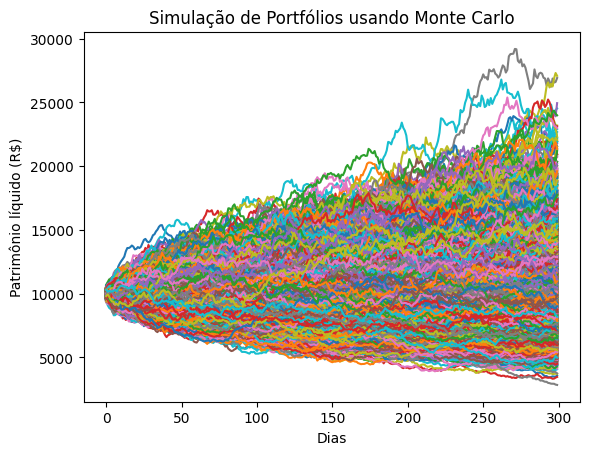

In [ ]:
for m in range (0, mc_sims):
    Z = np.random.normal(size = (T, len(weights)))
    # Decompomos a matriz de covariância de forma a adicionar o componente aleatório
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Patrimônio líquido (R$)')
plt.xlabel('Dias')
plt.title('Simulação de Portfólios usando Monte Carlo')
plt.show()

Para cada simulação m no intervalo de 0 a mc_sims - 1:

Gera uma matriz de números aleatórios normalmente distribuídos Z com tamanho (T, número de ativos).


Calcula a decomposição de Cholesky da matriz de covariância covMatrix dos retornos dos ativos. A decomposição de Cholesky é usada para gerar uma matriz triangular inferior L tal que covMatrix = L * L^T.


Calcula os retornos diários simulados dailyReturns para cada ativo usando a fórmula meanM + np.inner(L, Z).
Calcula os retornos acumulados do portfólio portfolio_sims[:, m] usando os retornos diários simulados e os pesos do portfólio.

Os retornos são calculados como o produto interno (produto escalar) dos pesos do portfólio com os retornos diários simulados, mais 1 (para representar o retorno total), e então acumulados ao longo do tempo usando np.cumprod.

Esses retornos acumulados são então multiplicados pelo tamanho do portfólio inicial initialPortfolio.

In [ ]:
pd.DataFrame(dailyReturns)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.022813,-0.007192,0.009579,-0.008000,0.019956,0.014945,0.010332,-0.020651,0.024441,0.008281,...,-0.005586,0.004231,-0.004546,-0.022310,-0.021592,-0.034051,-0.009264,0.001654,0.019699,-0.019565
1,0.001859,0.014346,0.008342,-0.021080,0.009398,0.018814,-0.004526,0.033079,0.000836,-0.000381,...,-0.016108,-0.040336,0.002168,0.002353,0.023439,0.042739,-0.038472,-0.017115,0.022311,0.006817
2,0.035985,0.007786,0.019517,0.033317,0.056719,0.016083,-0.011324,0.034746,0.014830,0.005773,...,-0.047804,-0.035952,0.026661,0.007322,-0.012865,0.082755,-0.024382,-0.029677,0.035710,0.024899
3,0.081639,0.029088,0.014672,-0.002979,0.021258,0.095801,-0.013679,0.015797,0.023741,0.055394,...,-0.076606,-0.010130,0.060439,0.021280,-0.024990,0.106628,-0.023791,0.014481,0.068730,-0.039835
4,-0.029658,-0.009722,0.000322,-0.041499,0.033901,0.020490,-0.014304,0.023942,0.045342,-0.037564,...,-0.030802,-0.010291,0.019294,0.002371,0.036075,0.021884,-0.013518,-0.006858,-0.016609,0.007149
5,-0.012756,-0.037062,0.014323,0.048697,0.063873,0.032078,0.025073,-0.003288,0.051323,-0.011085,...,-0.034217,-0.047924,0.012074,-0.000695,0.035491,0.038243,-0.041668,0.023423,-0.036408,-0.020081
6,-0.016920,0.015110,-0.007609,-0.010574,0.034997,0.027263,0.005855,-0.002947,0.036426,0.005224,...,0.016404,-0.029307,-0.015090,0.009676,0.037524,0.007978,-0.053271,0.025819,-0.005869,0.015666
7,0.013025,-0.014029,0.001246,-0.025515,0.035559,0.017932,0.008072,0.001072,0.021931,-0.003348,...,-0.009300,-0.023915,-0.005290,0.028725,-0.019410,0.014008,-0.022746,-0.009095,-0.044192,0.019134


Isolando o portfólio vencedor

In [ ]:
returns_portfolio = pd.DataFrame(portfolio_sims)

In [ ]:
returns_portfolio

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,9980.571375,10008.628046,9925.927245,9856.175551,9933.157466,9972.590713,9943.564499,9648.174589,10191.192994,10083.962562,...,9965.166633,10036.509972,9935.377036,9922.208048,9936.704624,10053.689254,10038.126931,10073.882003,9810.806439,10296.231770
1,9927.917011,10004.400613,10154.226451,9854.574230,9861.882667,10055.247597,9965.982694,9784.704800,10288.373190,10037.748226,...,9863.966563,9925.322349,9861.443872,9700.280468,10001.781979,10132.027509,9980.938904,9988.735308,9940.675762,10150.970291
2,10032.163878,10097.800742,10240.905043,9726.515930,9842.860397,10425.330525,9828.300975,9822.017116,10308.527699,10175.239044,...,9912.899860,10108.477922,9563.899783,9739.941930,10073.097851,9887.522114,10104.670339,9997.747542,9764.382352,10222.497632
3,10138.540090,9967.538122,10211.929804,9637.104583,9831.217228,10213.921301,9622.945528,9701.399147,10148.275815,10015.910771,...,9887.478889,10025.026207,9377.114779,9708.068251,10158.154556,10108.634871,10246.543442,10174.006738,9513.854575,10163.388981
4,10074.722906,9842.165004,10378.867652,9601.786229,9643.584085,10290.612344,9715.703573,9958.239053,9969.992171,10188.135502,...,9801.376896,9718.442201,9369.566536,9926.486409,10070.213059,10267.289724,10217.923135,10156.546604,9367.051209,10174.670053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,11045.143004,9075.867987,11079.232294,13068.566906,8492.150577,13702.715778,10183.262742,9355.705878,12771.189974,6765.266760,...,8912.188964,11553.515263,6403.394149,7406.010411,11288.476367,9420.259059,12764.077993,6944.958467,14178.949558,8630.252775
296,10994.431630,8940.915522,11359.908839,12883.776644,8568.501754,13597.928145,9984.521930,9508.702853,12774.546352,6764.256209,...,9023.274135,11517.572335,6330.473642,7187.586713,11621.716245,9407.990772,12848.902662,6990.818922,14195.407995,8566.284251
297,10732.130244,8872.020916,11557.088031,12484.843174,8502.953206,13307.651738,9988.770069,9581.118836,12630.151637,6762.989667,...,8854.183318,11285.377123,6446.743942,7280.961367,11891.298076,9523.546517,12932.113428,6964.245898,14143.837954,8601.077516
298,10940.592064,8937.002578,11758.793480,12600.172593,8574.725321,13195.894905,9925.024716,9492.494905,12594.105827,6784.431076,...,8857.883747,10840.558455,6544.813673,7125.471587,11952.917460,9560.606732,12870.204056,6988.792809,14231.121473,8319.010659


In [ ]:
returns_portfolio.iloc[-1].sort_values()

6927     2838.554606
2843     3464.324439
550      3574.400248
908      3702.595437
3307     3744.053699
            ...     
7142    23988.696870
689     24527.849776
974     24943.071207
27      26916.346690
1938    27085.225292
Name: 299, Length: 10000, dtype: float64

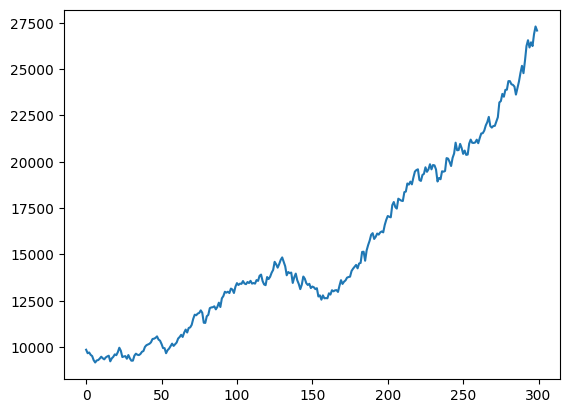

In [ ]:
returns_portfolio[1938].plot();